<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Predicting-Fraudulent-Transactions/blob/main/insaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name - Predicting Fraudulent Transactions

Project Summary-

Github Link - 

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [4]:
#Loading data
df = pd.read_csv('/content/drive/MyDrive/INSAID/Fraud (1).csv')

In [5]:
#Data First View
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
#Data rows and columns
df.shape

(6362620, 11)

In [7]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
duplicated_row = df[df.duplicated()]

In [9]:
duplicated_row

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [10]:
#Missing value or null value
null_value_count = df.isnull().sum()


In [11]:
null_value_count

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

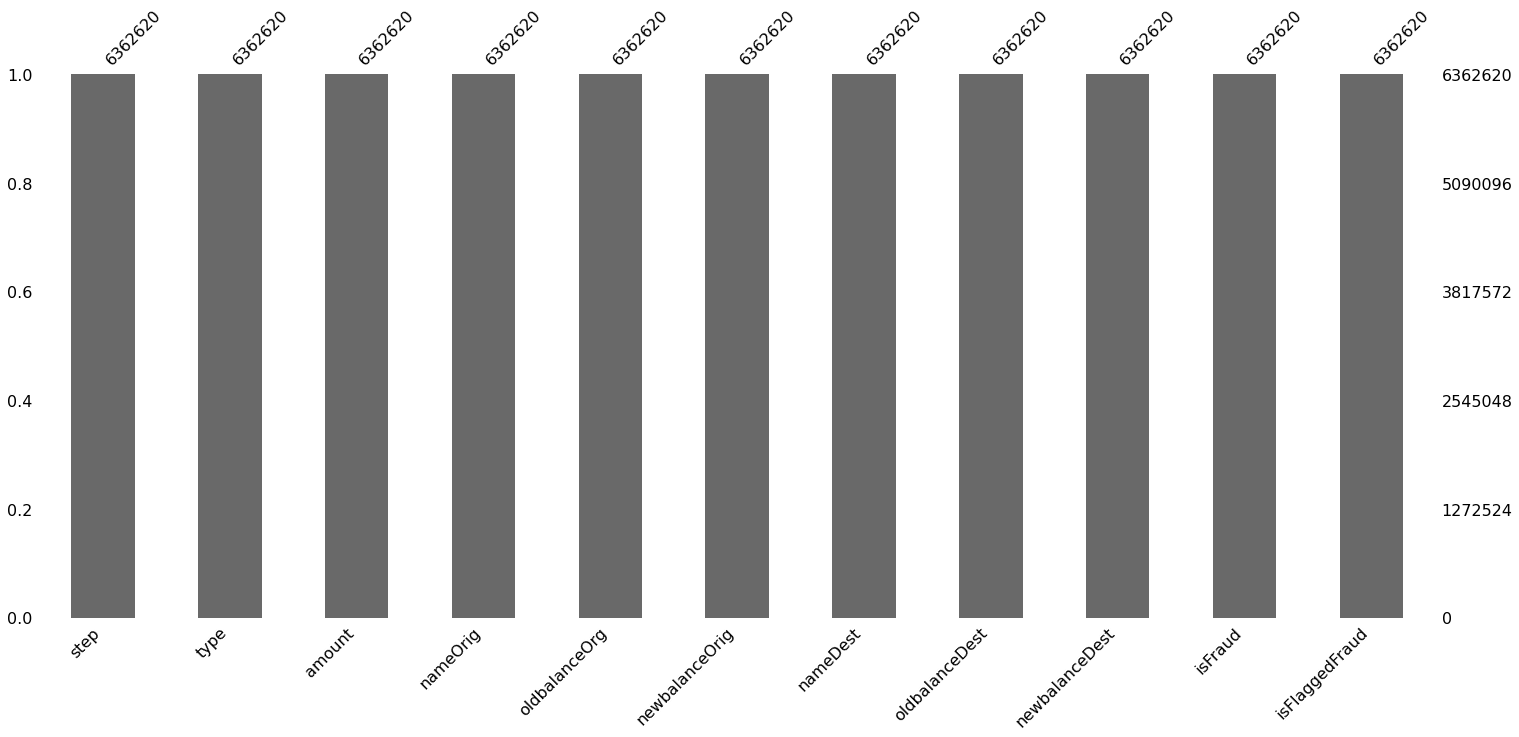

In [12]:
msno.bar(df)

In [13]:
#Understanding our variable
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0






*   Step : Step is basically count of steps
*   Type : Type is mode of transfer(like cash out or transfer)

*   amount : Amount transfer from the account
*   nameorig : means name of the account holder

*   oldbalanceorg : means balance before transaction
*   newbalanceog : means new balance after transaction


*   namedest : person who is reciving the amount
*   oldbalancedest : Recept before transaction


*   new balance dest : new balance recept
*   is Fraud : Either fraud or not

*   is FlaggedFraud : its a bank security thing that try to find it's a fraud or not after ttransaction














### Data Wrangling

Int this step, the data is understand more deeply before implementing method of cleaning.

In [15]:
#Data Wrangling
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [16]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [17]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [18]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100


step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
df.rename(columns = {'step':'Hour','amount':'Amount','oldbalanceOrg':'Old_balance','newbalanceOrig':'New_balance','oldbalanceDest':'Balance_before_trans'
                     ,'newbalanceDest':'Balance_after_trans'}, inplace= True)

In [22]:
df

,Hour,type,Amount,nameOrig,Old_balance,New_balance,nameDest,Balance_before_trans,Balance_after_trans,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Visualization

### Univariate Analysis

In [21]:
df['isFraud'].unique()

array([0, 1])

In [22]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

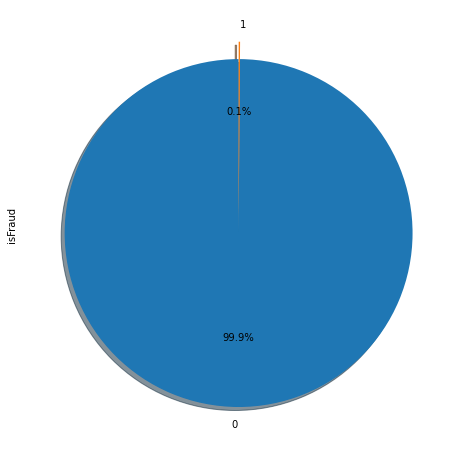

In [23]:
df['isFraud'].value_counts().plot.pie(explode=[0.05,0.05], autopct = '%1.1f%%',  startangle = 90, shadow =True,figsize=(8,8))

In [24]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [25]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

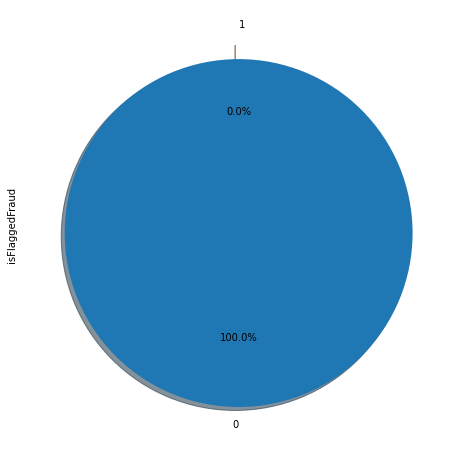

In [26]:
df['isFlaggedFraud'].value_counts().plot.pie(explode=[0.05,0.05], autopct = '%1.1f%%',  startangle = 90, shadow =True,figsize=(8,8))

In [27]:
df['Hour'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [28]:
df['Hour'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: Hour, Length: 743, dtype: int64

In [29]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [30]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

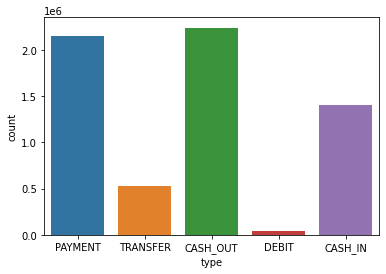

In [31]:
sns.countplot(x=df.type)

In [32]:
# Repetative payment
most_common_repetative_payment = df['Amount'].value_counts().head(15)

In [33]:
most_common_repetative_payment

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
100000.00        42
21500.00         37
120000.00        29
135000.00        20
0.00             16
2152.26           9
1711.67           9
3748.95           9
5047.67           9
4546.07           9
Name: Amount, dtype: int64

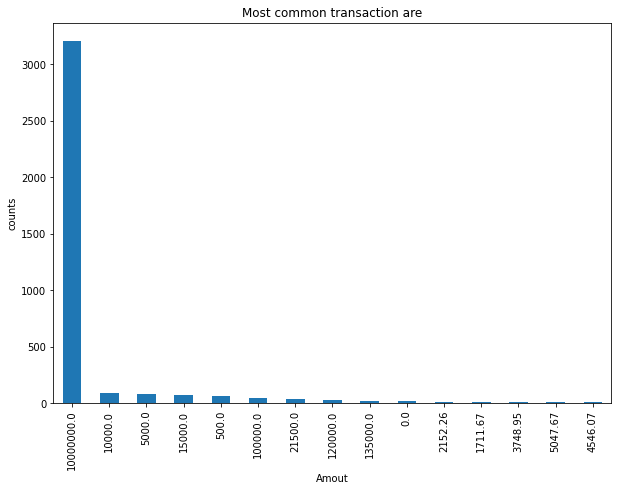

In [34]:
plt.rcParams['figure.figsize'] = (10,7)
df['Amount'].value_counts().head(15).plot.bar()
plt.title('Most common transaction are')
plt.xlabel('Amout')
plt.ylabel('counts')
plt.show()

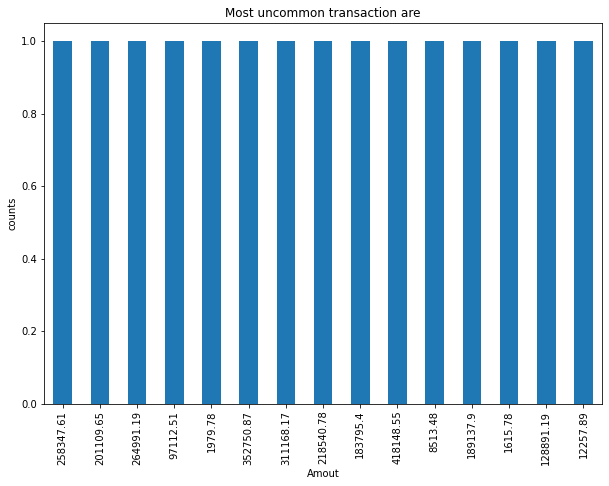

In [35]:
plt.rcParams['figure.figsize'] = (10,7)
df['Amount'].value_counts().tail(15).plot.bar()
plt.title('Most uncommon transaction are')
plt.xlabel('Amout')
plt.ylabel('counts')
plt.show()

In [36]:
df.columns

Index(['Hour', 'type', 'Amount', 'nameOrig', 'Old_balance', 'New_balance',
       'nameDest', 'Balance_before_trans', 'Balance_after_trans', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

(array([6.052228e+06, 2.068800e+05, 5.388100e+04, 3.326200e+04,
        1.488700e+04, 1.449000e+03, 2.300000e+01, 6.000000e+00,
        2.000000e+00, 2.000000e+00]),
 array([       0.   ,  5958504.037, 11917008.074, 17875512.111,
        23834016.148, 29792520.185, 35751024.222, 41709528.259,
        47668032.296, 53626536.333, 59585040.37 ]),
 <a list of 10 Patch objects>)

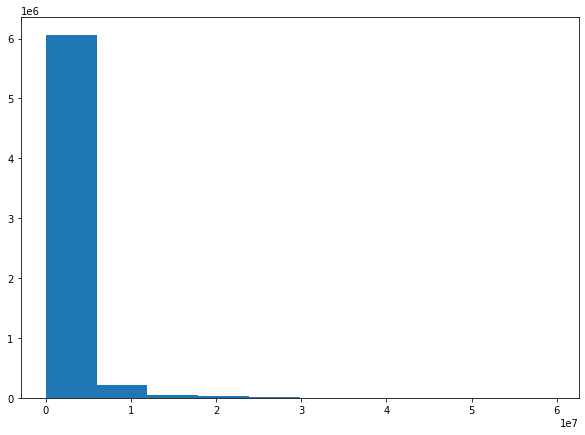

In [37]:
plt.hist(df['Old_balance'],bins = 10)

(array([5.980755e+06, 2.344650e+05, 7.282300e+04, 3.697800e+04,
        2.442500e+04, 1.153100e+04, 1.591000e+03, 4.500000e+01,
        5.000000e+00, 2.000000e+00]),
 array([       0.   ,  4958504.037,  9917008.074, 14875512.111,
        19834016.148, 24792520.185, 29751024.222, 34709528.259,
        39668032.296, 44626536.333, 49585040.37 ]),
 <a list of 10 Patch objects>)

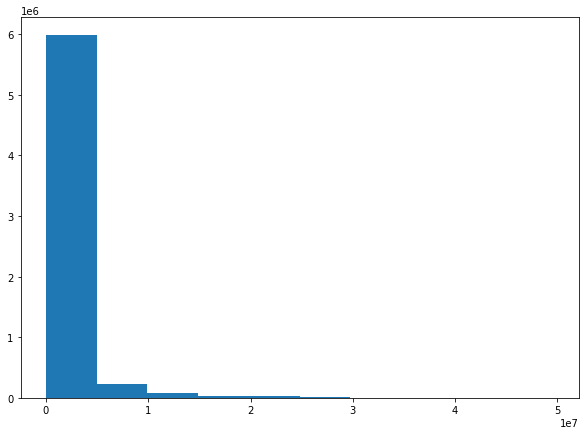

In [38]:
plt.hist(df['New_balance'],bins = 10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


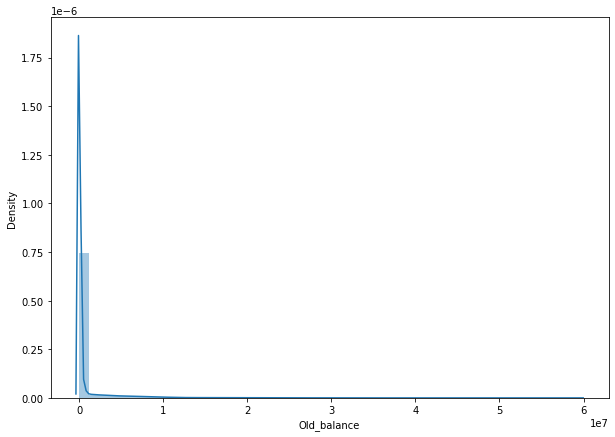

In [39]:
sns.distplot(df['Old_balance'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


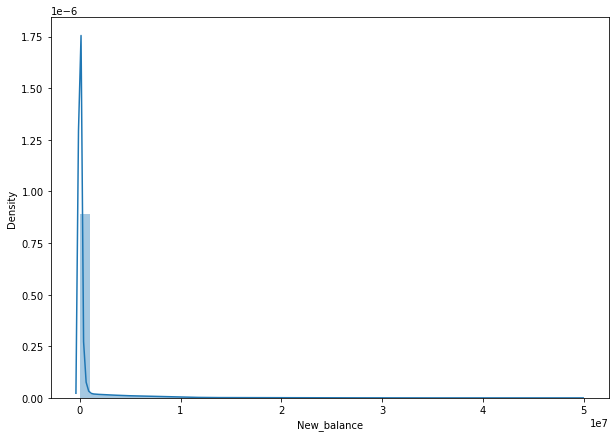

In [40]:
sns.distplot(df['New_balance'])

In [41]:
df.columns

Index(['Hour', 'type', 'Amount', 'nameOrig', 'Old_balance', 'New_balance',
       'nameDest', 'Balance_before_trans', 'Balance_after_trans', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


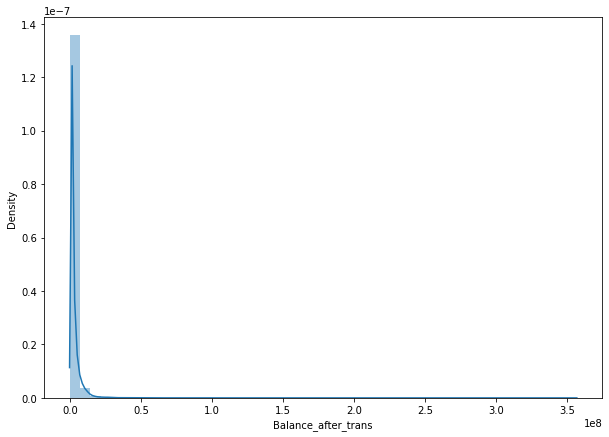

In [42]:
sns.distplot(df['Balance_after_trans'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


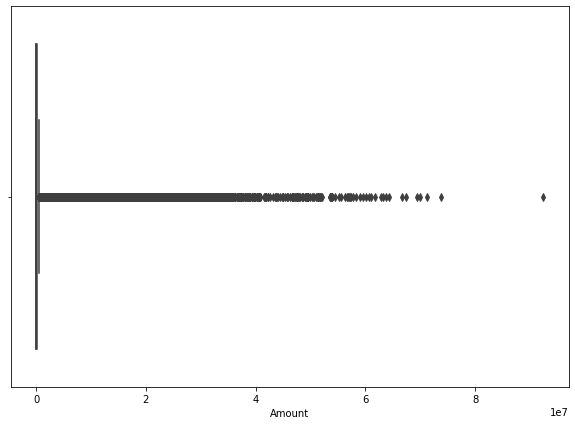

In [43]:
sns.boxplot(df['Amount'])

## Bivariate Aanlysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


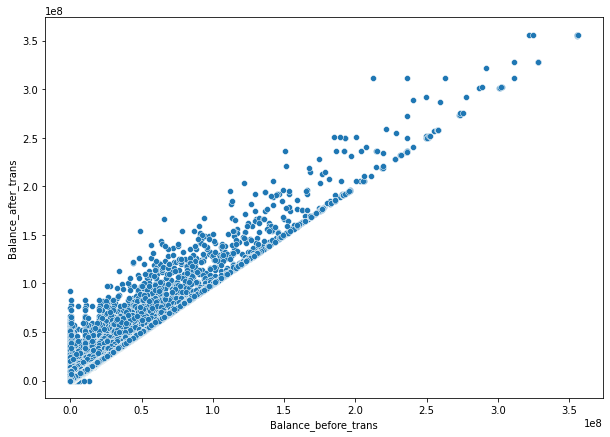

In [44]:
sns.scatterplot(df['Balance_before_trans'],df['Balance_after_trans'])

In [45]:
df.groupby('type').mean()['Amount']

type
CASH_IN     168920.242004
CASH_OUT    176273.964346
DEBIT         5483.665314
PAYMENT      13057.604660
TRANSFER    910647.009645
Name: Amount, dtype: float64

In [46]:
#sns.pairplot(df)

In [47]:
numerical_col = list(df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_col)
numerical_features

Index(['Hour', 'Amount', 'Old_balance', 'New_balance', 'Balance_before_trans',
       'Balance_after_trans', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

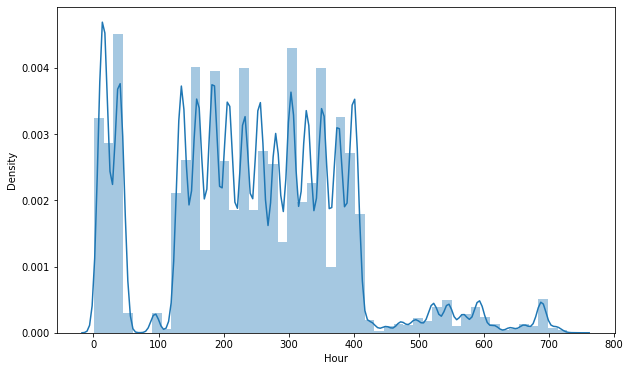

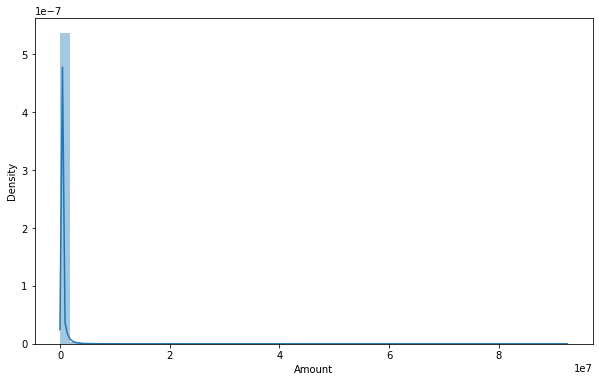

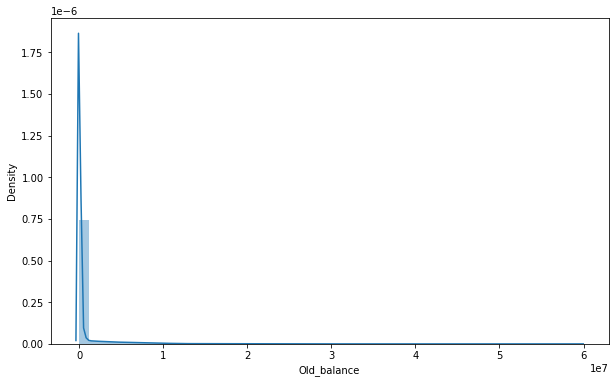

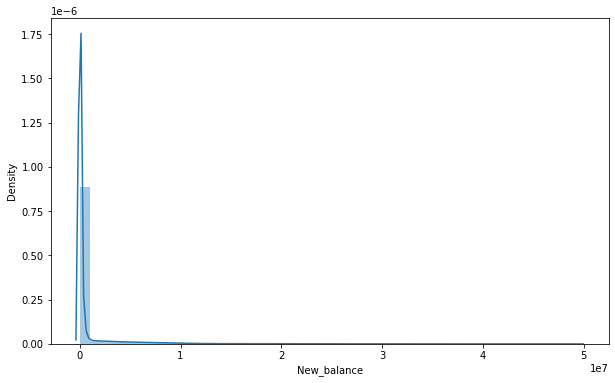

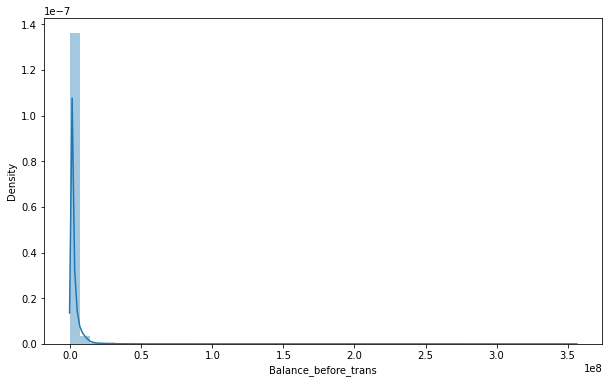

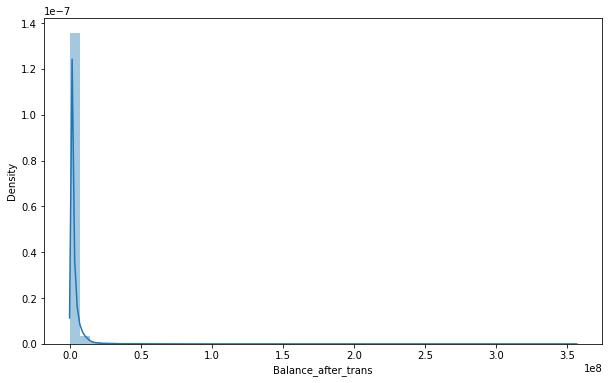

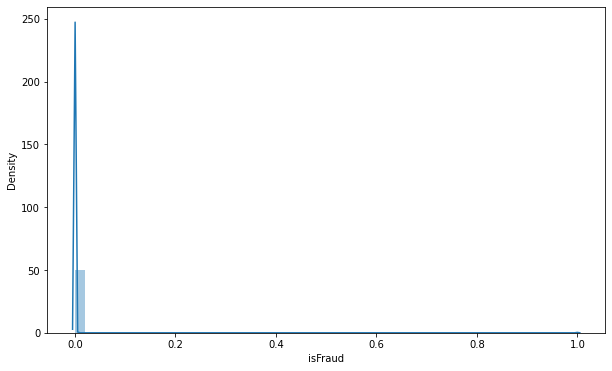

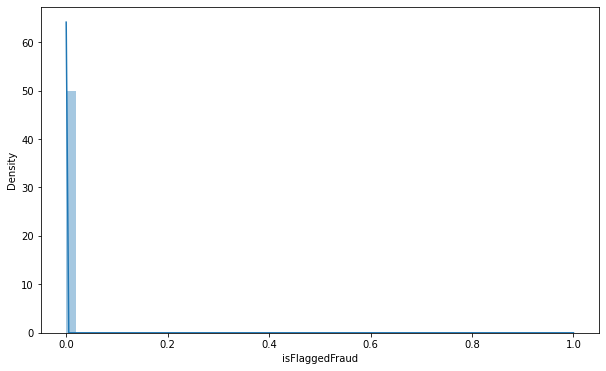

In [48]:
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

### Numerical vs Fraud

In [49]:
df.columns

Index(['Hour', 'type', 'Amount', 'nameOrig', 'Old_balance', 'New_balance',
       'nameDest', 'Balance_before_trans', 'Balance_after_trans', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

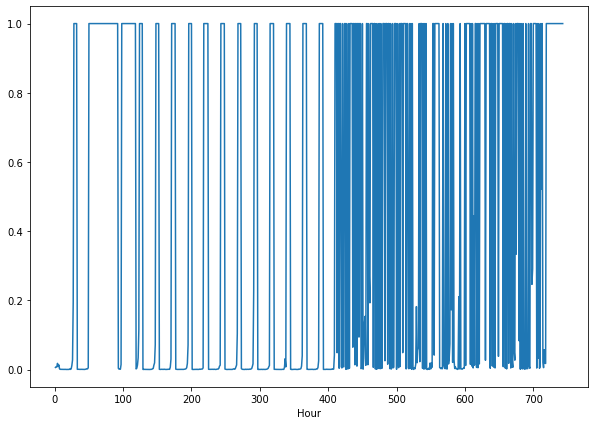

In [50]:
#print the plot to analyze the relationship between idFraud and Hour 
df.groupby('Hour').mean()['isFraud'].plot()

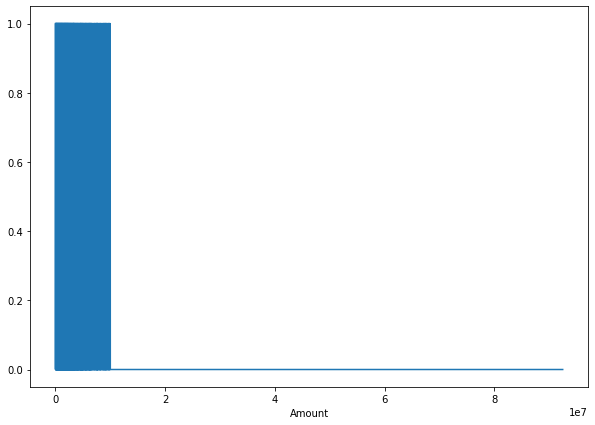

In [51]:
#print the plot to analyze the relationship between isFraud and Amount
df.groupby('Amount').mean()['isFraud'].plot()

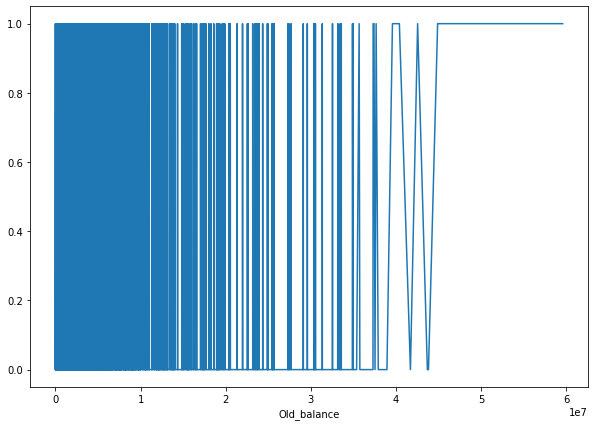

In [52]:
#relationship between isFraud and Old_Balance
df.groupby('Old_balance').mean()['isFraud'].plot()

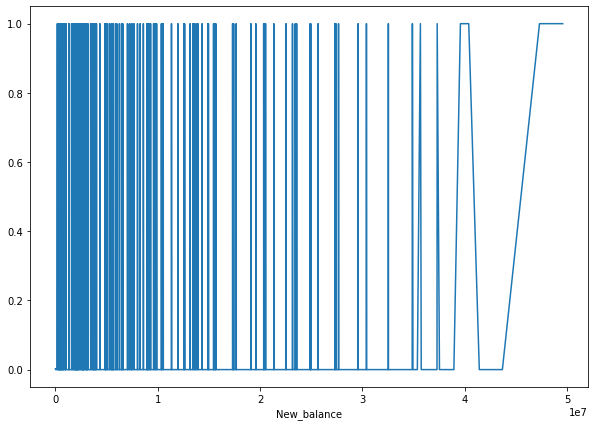

In [53]:
#relationship between new Balance and isFraud.
df.groupby('New_balance').mean()['isFraud'].plot()

In [54]:
df.columns

Index(['Hour', 'type', 'Amount', 'nameOrig', 'Old_balance', 'New_balance',
       'nameDest', 'Balance_before_trans', 'Balance_after_trans', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

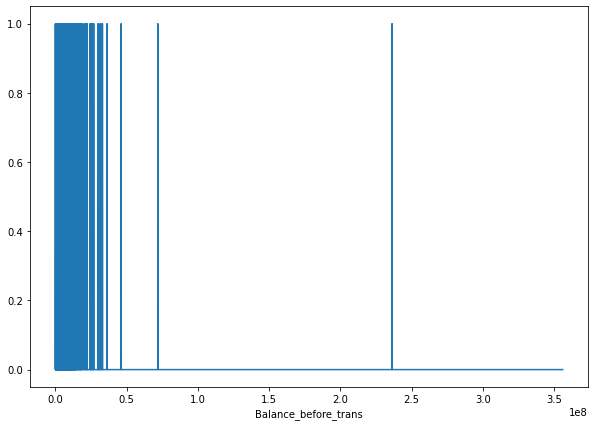

In [55]:
#relationship between balance before transfers and isFraud
df.groupby('Balance_before_trans').mean()['isFraud'].plot()

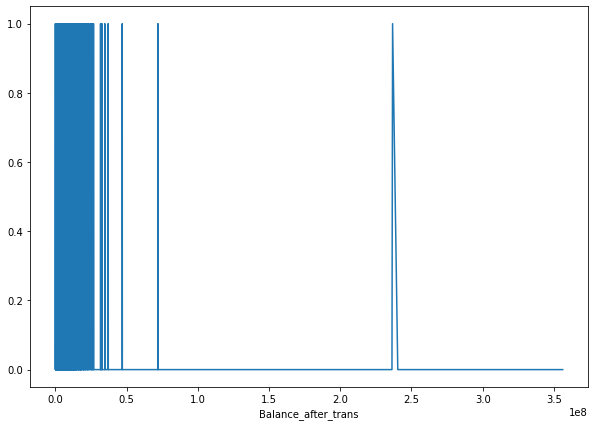

In [56]:
#relationship between balance after transfers and isFraud
df.groupby('Balance_after_trans').mean()['isFraud'].plot()

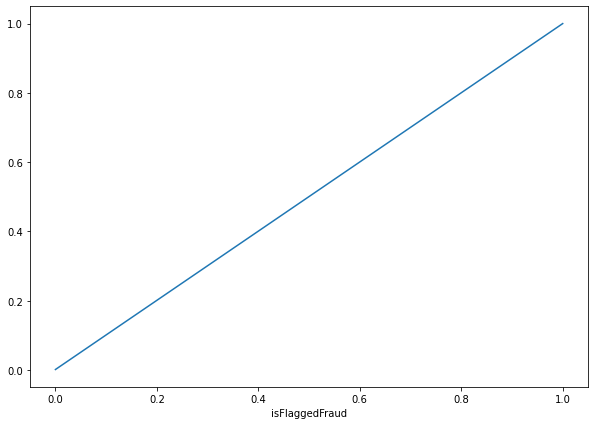

In [57]:
#relationship between isFlaggedFraud and i
df.groupby('isFlaggedFraud').mean()['isFraud'].plot()

In [ ]:
for col in numerical_col:
  fig,ax=plt.subplots(figsize = (10,6))
  sns.regplot(x=df[col],y=df['isFraud'],scatter_kws = {"color": "blue"},line_kws={"color":'black'})

KeyboardInterrupt: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


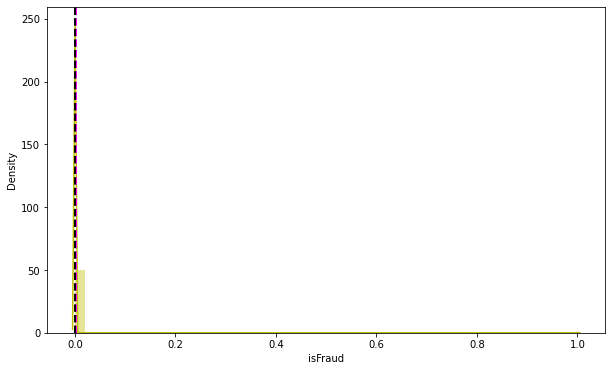

In [27]:
#Normalise isFraud column data
plt.figure(figsize = (10,6))
plt.xlabel('isFraud')
plt.ylabel('Density')
ax=sns.distplot(df['isFraud'],hist=True, color='y')
ax.axvline(df['isFraud'].mean(),color= 'magenta',linestyle = 'dashed',linewidth=2)
ax.axvline(df['isFraud'].median(),color= 'black', linestyle = 'dashed', linewidth = 2)

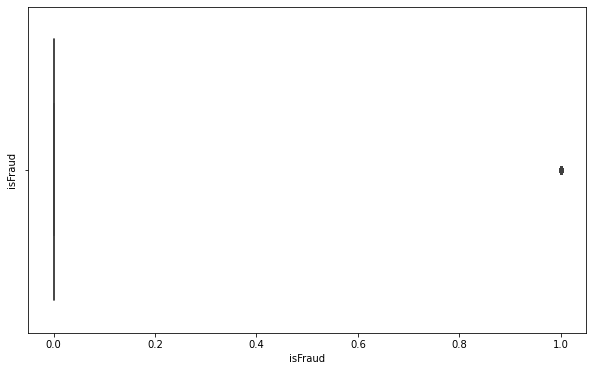

In [28]:
#boxplot of rented bike count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('isFraud')
sns.boxplot(x=df['isFraud'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


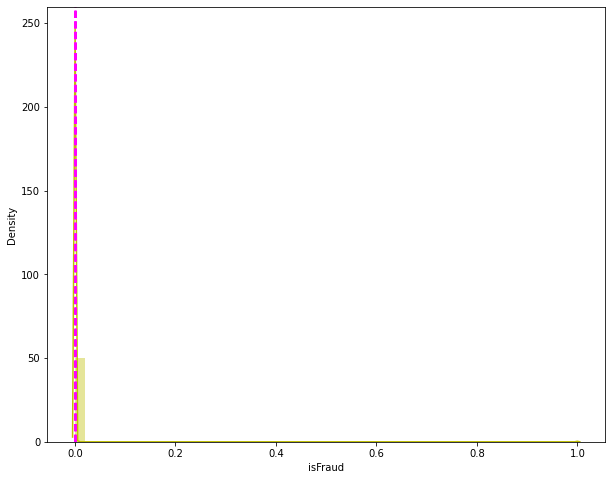

In [29]:
plt.figure(figsize=(10,8))
plt.xlabel('isFraud')
plt.ylabel('Density')

ax= sns.distplot(np.sqrt(df['isFraud']), color = 'y')
ax.axvline(np.sqrt(df['isFraud']).mean(), color='magenta', linestyle='dashed',linewidth = 2 )
ax.axvline(np.sqrt(df['isFraud']).median(), color='magenta', linestyle='dashed',linewidth = 2 )

plt.show()

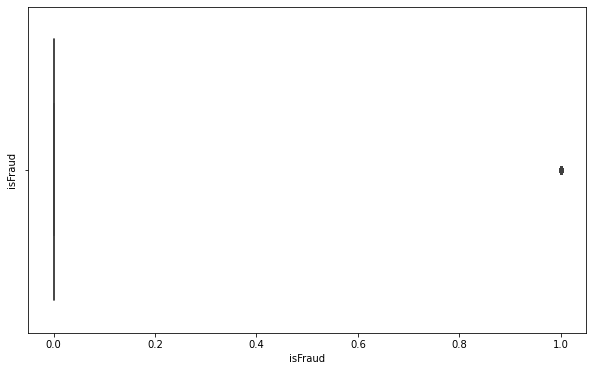

In [30]:
#boxplot of rented bike count to check outliers
from scipy import stats
plt.figure(figsize=(10,6))
plt.ylabel('isFraud')
sns.boxplot(x=np.sqrt(df['isFraud']))
plt.show()

Ordinary least square (OLS) regression is a ststistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [31]:
df.columns

Index(['Hour', 'type', 'Amount', 'nameOrig', 'Old_balance', 'New_balance',
       'nameDest', 'Balance_before_trans', 'Balance_after_trans', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [32]:
#import the module
import statsmodels.api as sm
x = df[['Hour','Amount','Old_balance','New_balance','Balance_before_trans','Balance_after_trans','isFlaggedFraud']]
y = df['isFraud']
df.head()

,Hour,type,Amount,nameOrig,Old_balance,New_balance,nameDest,Balance_before_trans,Balance_after_trans,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# add constant columns
x = sm.add_constant(x)
x

In [ ]:
model = sm.OLS(y, x).fit()
model.summary()

In [ ]:
x.corr()

Crerating dummy variables

In [33]:
# assigning all categorical features to variables
categorical_col = list(df.select_dtypes(['object','category']).columns)
categorical_col

['type', 'nameOrig', 'nameDest']

In [34]:
df = df.drop(['nameOrig','nameDest'], axis=1)

In [35]:
df_copy = pd.get_dummies(df,columns=['type'])

In [36]:
df_copy.head()

,Hour,Amount,Old_balance,New_balance,Balance_before_trans,Balance_after_trans,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


## Model Training

## Train Test split fro regression

In [37]:
#Assigning the value in x and y
X = df_copy.drop(columns=['isFraud'], axis = 1)
y = df_copy['isFraud']

In [ ]:
X.head()

In [39]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [40]:
#Creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(4771965, 12)
(1590655, 12)


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse',max_depth =8,max_features= 9 , max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

NameError: ignored

In [ ]:
#get x train and x test values
y_pred_train_data  = decision_regressor.predict(X_train)
y_pred_test_data = decision_regressor.predict(X_test)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
print("Model Score :", decision_regressor.score(X_train,y_train))


In [ ]:
#Calculate mean squared error
MSE_d = mean_squared_error(y_train, y_pred_train_data)
print("MSE :",MSE_d)

In [ ]:
#Calculate RMSE
RMSE_d = np.sqrt(MSE_d)
print("RMSE :", RMSE_d)

In [ ]:
#calculate mean absolute error
MAE_d = mean_absolute_error(y_train, y_pred_train_data)
print("MAE_d :", MAE_d)

In [ ]:
#calculate r2 score
from sklearn.metrics import r2_score
r2_d = r2_score(y_train, y_pred_train_data)
print("R2 :", r2_d)

In [ ]:
#Adjusted r2 
Adjusted_r2_data = (1-(1-r2_score(y_train, y_pred_train_data))*((X_test.shape[0]- X_test.shape[1]-1)))
print("Adjusted R2 :", 1-(1-r2_score(y_train, y_pred_train_data))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_r2_data),2)
      }

In [ ]:
dict1

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_data)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_data)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_data))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_data)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_data)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_r2_data),2)
      }


In [ ]:
dict2

In [ ]:
#Plot the figure
# plt.figure(figsize=(15,10))
# plt.plot((np.array(y_pred_test_data)))
# plt.plot(np.array((y_test)))
# plt.legend(["Predicted","Actual"])
# plt.show()

# Random Forest

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

In [ ]:
#get x train and x test values
y_pred_train_data  = rf_model.predict(X_train)
y_pred_test_data = rf_model.predict(X_test)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
print("Model Score :", decision_regressor.score(X_train,y_train))


In [ ]:
#Calculate mean squared error
MSE_d = mean_squared_error(y_train, y_pred_train_data)
print("MSE :",MSE_d)


#Calculate RMSE
RMSE_d = np.sqrt(MSE_d)
print("RMSE :", RMSE_d)

#calculate mean absolute error
MAE_d = mean_absolute_error(y_train, y_pred_train_data)
print("MAE_d :", MAE_d)

#calculate r2 score
from sklearn.metrics import r2_score
r2_d = r2_score(y_train, y_pred_train_data)
print("R2 :", r2_d)

#Adjusted r2 
Adjusted_r2_data = (1-(1-r2_score(y_train, y_pred_train_data))*((X_test.shape[0]- X_test.shape[1]-1)))
print("Adjusted R2 :", 1-(1-r2_score(y_train, y_pred_train_data))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict3={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_r2_data),2)
      }

In [ ]:
dict3

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_data)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_data)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_data))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_data)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_data)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict4={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_r2_data),2)
      }


In [ ]:
dict4